In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition-new.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  103 non-null    object 
 1   xbox    103 non-null    int64  
 2   ybox    103 non-null    int64  
 3   width   103 non-null    int64  
 4   height  103 non-null    int64  
 5   onpix   103 non-null    int64  
 6   xbar    103 non-null    float64
 7   ybar    103 non-null    float64
 8   x2bar   103 non-null    float64
 9   y2bar   103 non-null    float64
 10  xybar   103 non-null    float64
 11  x2ybar  103 non-null    float64
 12  xy2bar  103 non-null    float64
 13  xedge   103 non-null    float64
 14  xedgey  103 non-null    int64  
 15  yedge   103 non-null    float64
 16  yedgex  103 non-null    int64  
dtypes: float64(9), int64(7), object(1)
memory usage: 13.8+ KB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.378641,2.980583,17.135922,20.679612,200.058252,-0.018486,-0.006687,21.809404,33.039628,0.274856,-8.496939,-7.920455,2.514923,67.902913,2.227976,60.155340
std,1.935816,1.204408,3.739164,1.738907,57.071648,0.046978,0.045586,9.396190,8.661248,2.317476,42.073837,27.809566,0.690051,18.631364,0.872115,23.547098
min,0.000000,0.000000,6.000000,18.000000,77.000000,-0.180729,-0.131783,3.688312,19.689922,-6.443333,-162.803077,-94.832880,1.333333,36.000000,0.333333,9.000000
25%,3.000000,2.000000,15.000000,20.000000,158.500000,-0.040377,-0.023850,16.443610,26.585196,-0.231009,-17.056413,-19.861429,1.981481,53.500000,1.518519,41.000000
50%,5.000000,3.000000,17.000000,20.000000,198.000000,-0.007808,-0.001842,20.305556,30.593301,0.295276,-1.063981,-2.996835,2.444444,66.000000,2.185185,59.000000
75%,6.000000,4.000000,19.000000,22.000000,231.000000,0.002147,0.015045,26.643655,38.327108,1.154586,8.501922,3.808143,2.962963,80.000000,2.907407,78.500000
max,10.000000,5.000000,26.000000,26.000000,377.000000,0.134367,0.103516,54.713528,54.474490,8.040761,151.723982,73.959732,4.333333,117.000000,4.148148,112.000000


In [6]:
y = dataf.pop('letter')

In [8]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df

In [9]:
dataf_norm = norm(dataf)

<function matplotlib.pyplot.show(close=None, block=None)>

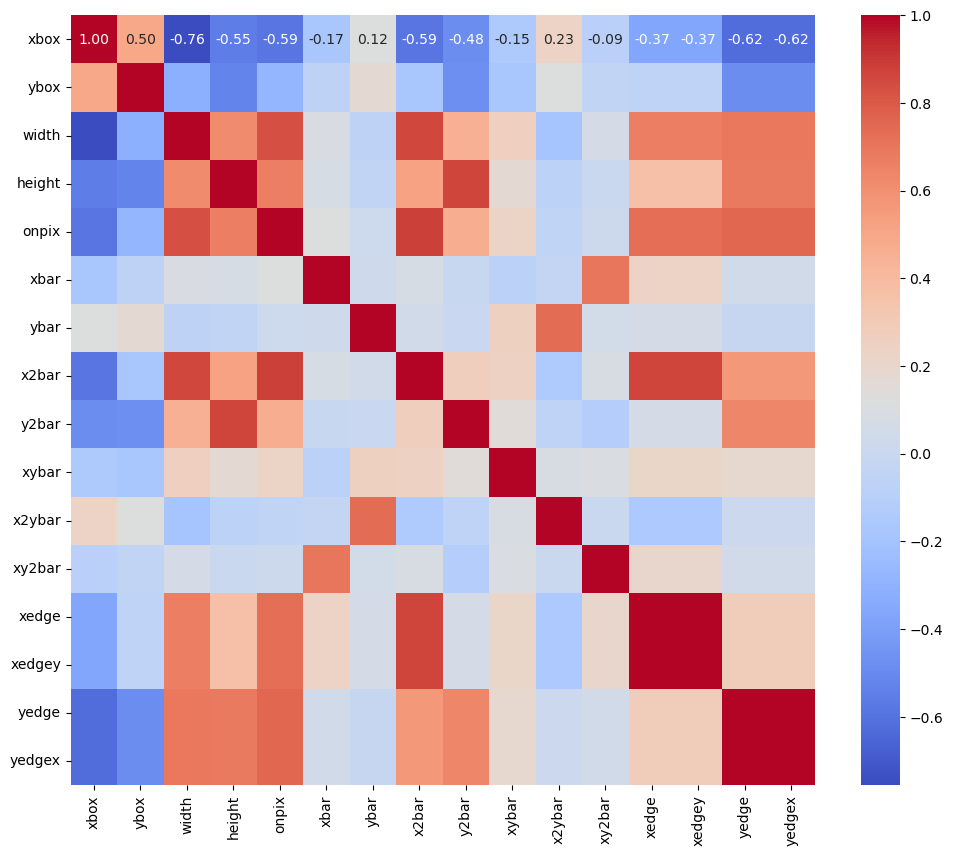

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf_norm.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [12]:
x_train,x_test,y_train,y_test=train_test_split(dataf_norm,y,test_size=0.15)

In [26]:
from sklearn.neighbors import KNeighborsClassifier


knn_lib=KNeighborsClassifier(3)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)

0.25